## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [ ]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [ ]:
df = pd.read_csv('Popular programming.csv', names=['Date', 'Tag', 'Posts'])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [ ]:
print(df.head())
print(df.tail())

                  Date       Tag  Posts
0                    m   TagName    NaN
1  2008-07-01 00:00:00        c#    3.0
2  2008-08-01 00:00:00  assembly    8.0
3  2008-08-01 00:00:00         c   83.0
4  2008-08-01 00:00:00        c#  505.0
                     Date     Tag   Posts
2548  2023-11-01 00:00:00     php  1646.0
2549  2023-11-01 00:00:00  python  9503.0
2550  2023-11-01 00:00:00       r  2114.0
2551  2023-11-01 00:00:00    ruby   166.0
2552  2023-11-01 00:00:00   swift   931.0


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [ ]:
print(df.shape)

(2553, 3)


**Challenge**: Count the number of entries in each column of the dataframe

In [ ]:
print(df.count())

Date     2553
Tag      2553
Posts    2552
dtype: int64


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [ ]:
print(df.groupby('Tag').sum(numeric_only=True))

                Posts
Tag                  
TagName           0.0
assembly      43661.0
c            401121.0
c#          1606926.0
c++          801783.0
delphi        51514.0
go            71628.0
java        1910306.0
javascript  2516924.0
perl          67950.0
php         1461948.0
python      2172281.0
r            500326.0
ruby         228646.0
swift        331245.0


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [ ]:
print(df.groupby('Tag').count())

            Date  Posts
Tag                    
TagName        1      0
assembly     184    184
c            184    184
c#           185    185
c++          184    184
delphi       184    184
go           169    169
java         184    184
javascript   184    184
perl         184    184
php          184    184
python       184    184
r            182    182
ruby         184    184
swift        176    176


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [ ]:
df['Date'][1]

'2008-07-01 00:00:00'

In [ ]:
type(df.Date[1])

str

In [ ]:
pd.to_datetime(df.Date[1])
type(pd.to_datetime(df.Date[1]))

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df.Date = pd.to_datetime(df.Date, errors='coerce')

In [ ]:
print(df.Date.head())

0          NaT
1   2008-07-01
2   2008-08-01
3   2008-08-01
4   2008-08-01
Name: Date, dtype: datetime64[ns]


## Data Manipulation



In [ ]:
reshaped_df = df.pivot(index='Date' , columns='Tag' , values='Posts')
print(reshaped_df)

Tag         TagName  assembly       c      c#     c++  delphi     go    java  \
Date                                                                           
NaT             NaN       NaN     NaN     NaN     NaN     NaN    NaN     NaN   
2008-07-01      NaN       NaN     NaN     3.0     NaN     NaN    NaN     NaN   
2008-08-01      NaN       8.0    83.0   505.0   164.0    14.0    NaN   222.0   
2008-09-01      NaN      28.0   320.0  1639.0   755.0   104.0    NaN  1129.0   
2008-10-01      NaN      16.0   303.0  1988.0   807.0   112.0    NaN  1149.0   
...             ...       ...     ...     ...     ...     ...    ...     ...   
2023-07-01      NaN     161.0   916.0  3870.0  1850.0    99.0  522.0  4061.0   
2023-08-01      NaN     144.0   865.0  3652.0  1668.0   106.0  494.0  3830.0   
2023-09-01      NaN     157.0   876.0  3060.0  1497.0   105.0  426.0  3340.0   
2023-10-01      NaN     177.0   979.0  3217.0  1732.0   166.0  423.0  3455.0   
2023-11-01      NaN     205.0  1024.0  3

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [ ]:
reshaped_df.shape

(186, 15)

In [ ]:
reshaped_df.columns

Index(['TagName', 'assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java',
       'javascript', 'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='Tag')

In [ ]:
reshaped_df.head()

Tag,TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-07-01,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,NaN,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,NaN,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,475.0,538.0,6.0,286.0,NaN
2008-10-01,NaN,16.0,303.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,609.0,506.0,NaN,247.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [ ]:
reshaped_df.count()

Tag
TagName         0
assembly      184
c             184
c#            185
c++           184
delphi        184
go            169
java          184
javascript    184
perl          184
php           184
python        184
r             182
ruby          184
swift         176
dtype: int64

In [ ]:
reshaped_df.fillna(0, inplace=True)

In [ ]:
reshaped_df.isna().values.any()

False

In [ ]:
print(reshaped_df )

Tag         TagName  assembly       c      c#     c++  delphi     go    java  \
Date                                                                           
NaT             0.0       0.0     0.0     0.0     0.0     0.0    0.0     0.0   
2008-07-01      0.0       0.0     0.0     3.0     0.0     0.0    0.0     0.0   
2008-08-01      0.0       8.0    83.0   505.0   164.0    14.0    0.0   222.0   
2008-09-01      0.0      28.0   320.0  1639.0   755.0   104.0    0.0  1129.0   
2008-10-01      0.0      16.0   303.0  1988.0   807.0   112.0    0.0  1149.0   
...             ...       ...     ...     ...     ...     ...    ...     ...   
2023-07-01      0.0     161.0   916.0  3870.0  1850.0    99.0  522.0  4061.0   
2023-08-01      0.0     144.0   865.0  3652.0  1668.0   106.0  494.0  3830.0   
2023-09-01      0.0     157.0   876.0  3060.0  1497.0   105.0  426.0  3340.0   
2023-10-01      0.0     177.0   979.0  3217.0  1732.0   166.0  423.0  3455.0   
2023-11-01      0.0     205.0  1024.0  3

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [ ]:
import matplotlib.pyplot as plt

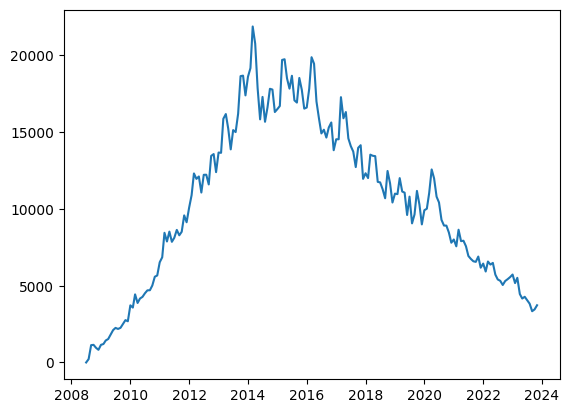

In [ ]:
plt.plot(reshaped_df.index, reshaped_df.java)

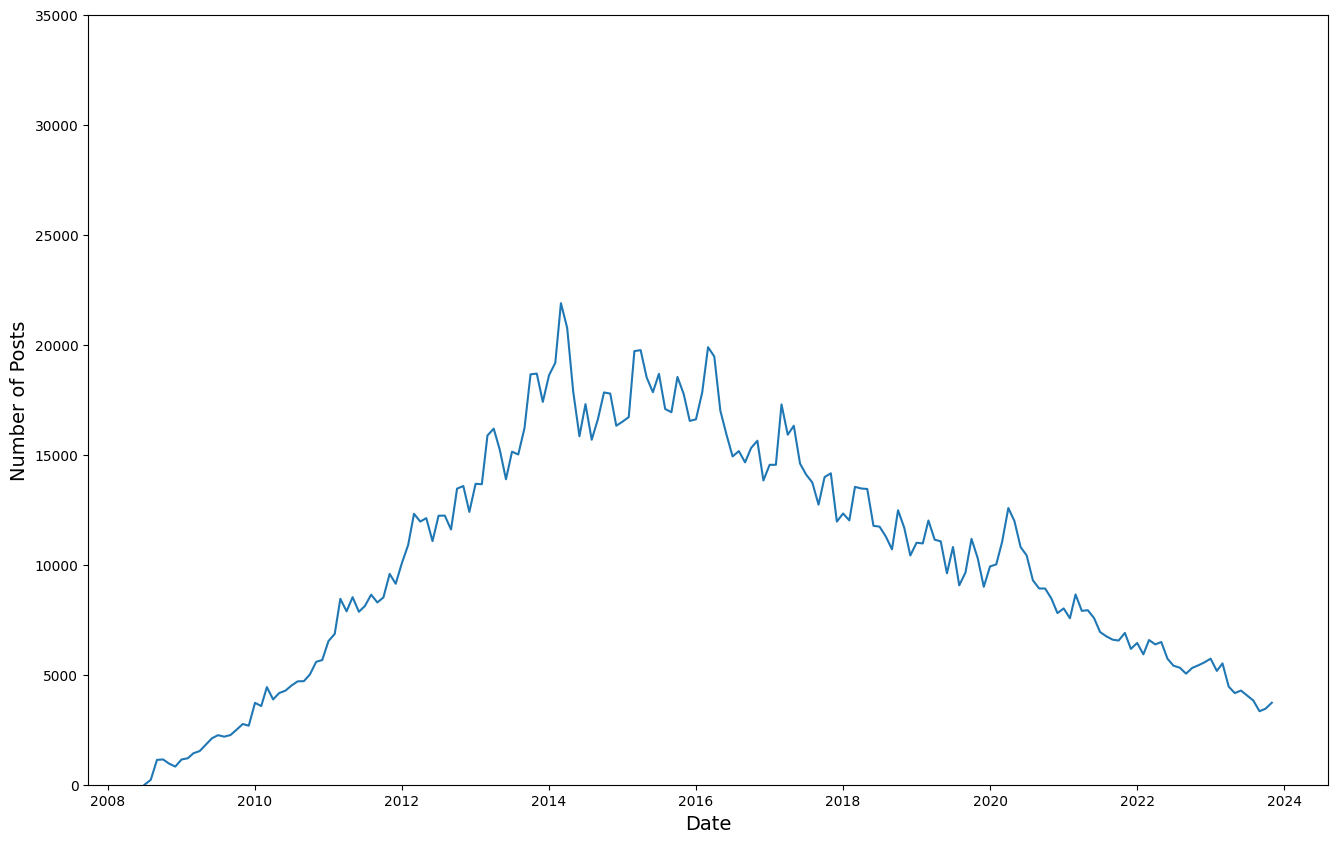

In [ ]:
plt.figure(figsize=(16,10))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

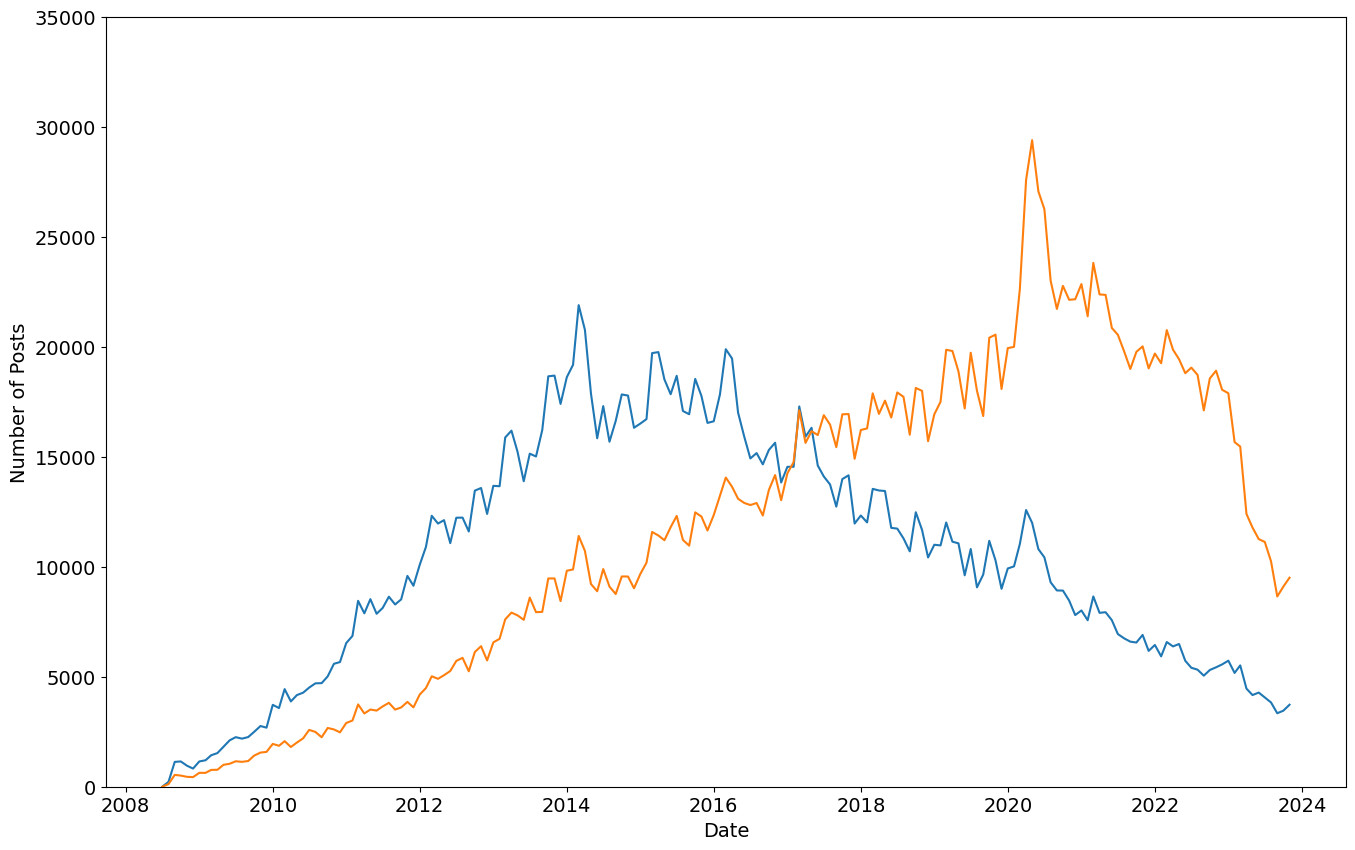

In [ ]:
plt.figure(figsize=(16,10)) # make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)

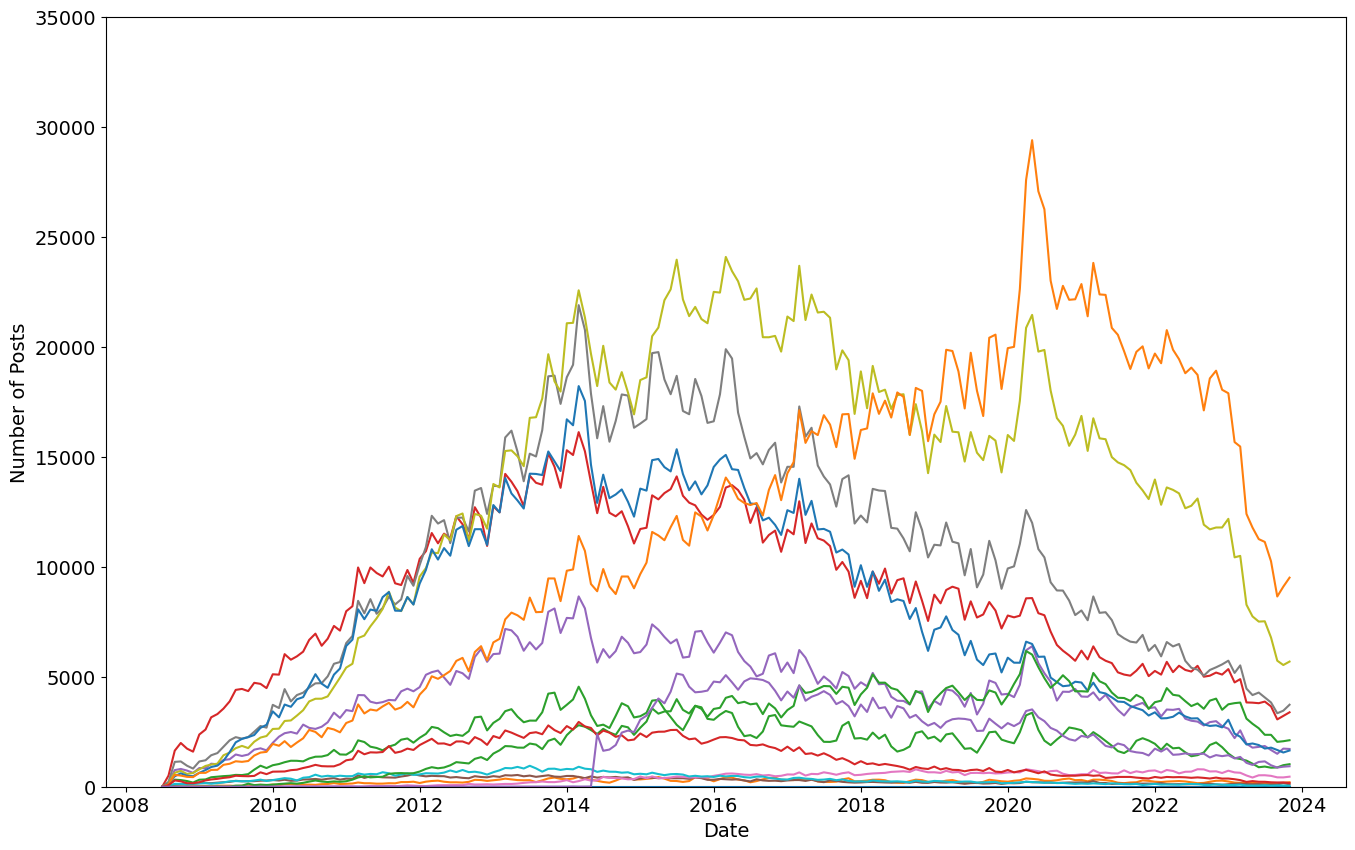

In [ ]:
plt.figure(figsize=(16,10)) # make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column])

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

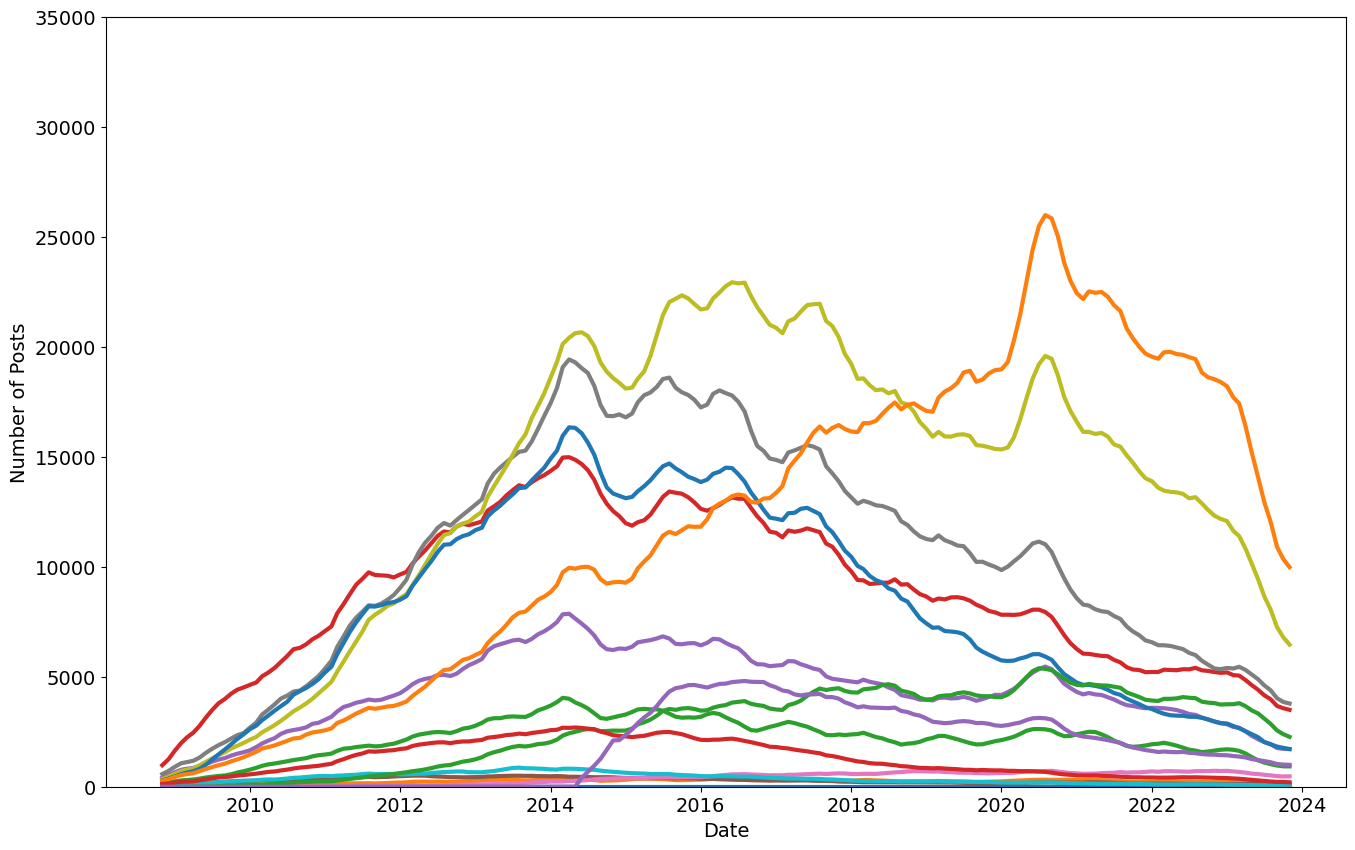

In [ ]:
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

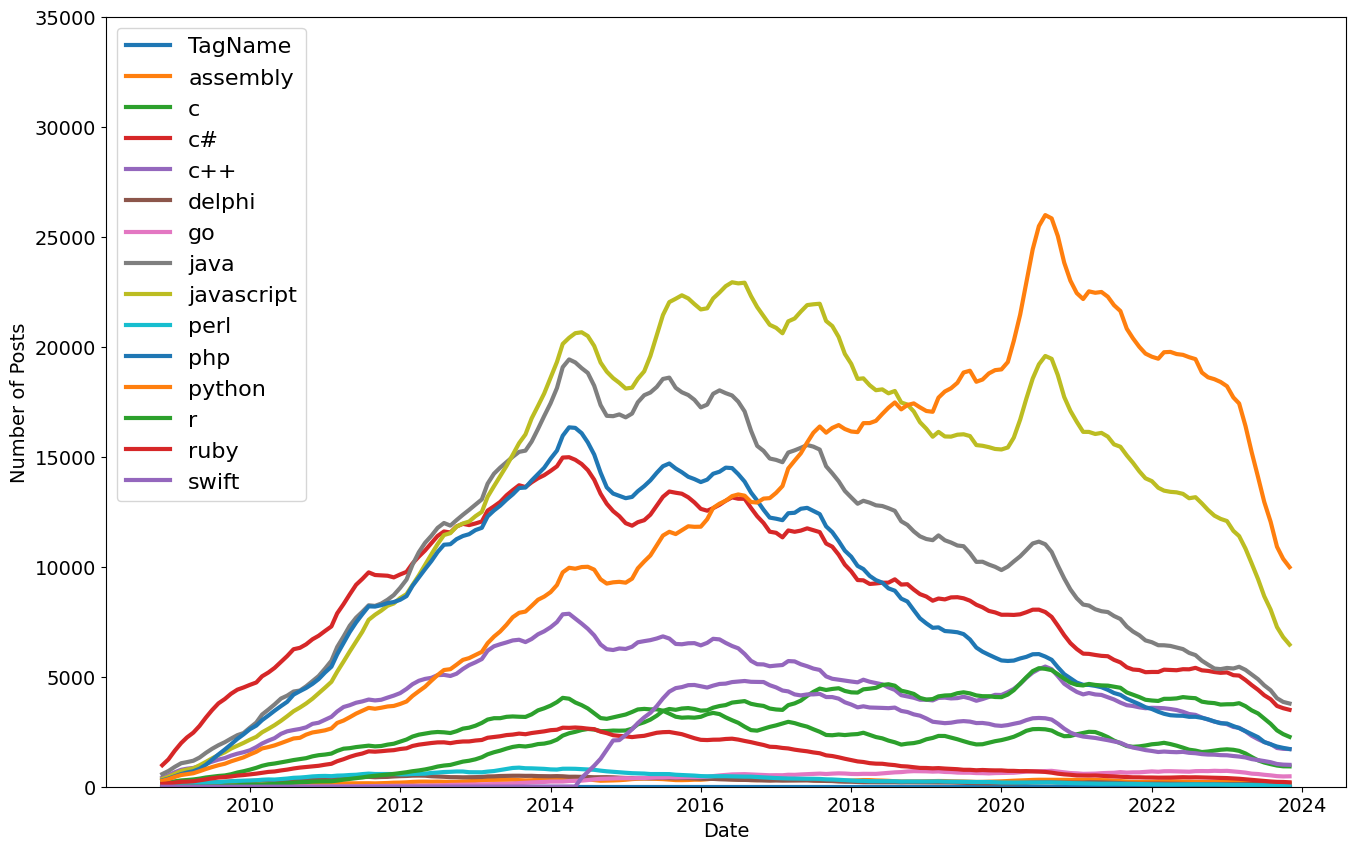

In [ ]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)